In [ ]:
# 한글 폰트 설치하기 (꼭! 설치가 완료되면 [런타임 다시 시작]을 누르고 다시 실행하기)
# !apt install fonts-nanum -y

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정하기
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
plt.rc('font', family='NanumBarunGothic')
matplotlib.font_manager._rebuild()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random


import tensorflow_datasets as tfds
import tensorflow as tf

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

import torchvision
from torchvision import datasets, models, transforms

import numpy as np
import time


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # device 객체

In [ ]:
import os
import shutil

In [ ]:
directory_list = [
    '/content/drive/MyDrive/final_project/food_img/food_split/train/',
    '/content/drive/MyDrive/final_project/food_img/food_split/test/',
]

# 초기 디렉토리 만들기
for directory in directory_list:
    if not os.path.isdir(directory):
        os.makedirs(directory)

# 수집한 이미지를 학습 데이터와 평가 데이터로 구분하는 함수
def dataset_split(query, train_cnt):
    # 학습 및 평가 데이터셋 디렉토리 만들기
    for directory in directory_list:
        if not os.path.isdir(directory + '/' + query):
            os.makedirs(directory + '/' + query)
    # 학습 및 평가 데이터셋 준비하기
    cnt = 0
    for file_name in os.listdir('/content/drive/MyDrive/final_project/food_img/train/' + query):
        if cnt < train_cnt:
            print(f'[Train Dataset] {file_name}')
            #shutil.move(query + '/' + file_name, '/content/drive/MyDrive/final_project/food_img/food_split/train/' + query + '/' + file_name)
            shutil.copyfile('/content/drive/MyDrive/final_project/food_img/train/'+ query + '/' + file_name, '/content/drive/MyDrive/final_project/food_img/food_split/train/' + query + '/' + file_name)
        else:
            print(f'[Test Dataset] {file_name}')
            #shutil.move(query + '/' + file_name, '/content/drive/MyDrive/final_project/food_img/food_split/test/' + query + '/' + file_name)
            shutil.copyfile('/content/drive/MyDrive/final_project/food_img/train/'+ query + '/' + file_name, '/content/drive/MyDrive/final_project/food_img/food_split/test/' + query + '/' + file_name)
        cnt += 1
    shutil.rmtree(query)

In [ ]:
# 데이터셋을 불러올 때 사용할 변형(transformation) 객체 정의
transforms_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(), # 데이터 증진(augmentation)
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # 정규화(normalization)
])

transforms_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

data_dir = '/content/drive/MyDrive/final_project/food_img'
train_datasets = datasets.ImageFolder(os.path.join(data_dir, 'train'), transforms_train)
test_datasets = datasets.ImageFolder(os.path.join(data_dir, 'test'), transforms_test)

train_dataloader = torch.utils.data.DataLoader(train_datasets, batch_size=4, shuffle=True, num_workers=4)
test_dataloader = torch.utils.data.DataLoader(test_datasets, batch_size=4, shuffle=True, num_workers=4)

print('학습 데이터셋 크기:', len(train_datasets))
print('테스트 데이터셋 크기:', len(test_datasets))

class_names = train_datasets.classes
print('클래스:', class_names)

학습 데이터셋 크기: 1500
테스트 데이터셋 크기: 30
클래스: ['01011001', '01015010', '01015013', '04016001', '12011008']


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


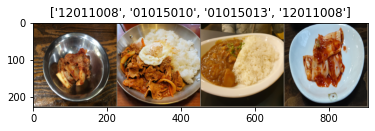

In [ ]:
def imshow(input, title):
    # torch.Tensor를 numpy 객체로 변환
    input = input.numpy().transpose((1, 2, 0))
    # 이미지 정규화 해제하기
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    input = std * input + mean
    input = np.clip(input, 0, 1)
    # 이미지 출력
    plt.imshow(input)
    plt.title(title)
    plt.show()


# 학습 데이터를 배치 단위로 불러오기
iterator = iter(train_dataloader)

# 현재 배치를 이용해 격자 형태의 이미지를 만들어 시각화
inputs, classes = next(iterator)
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[class_names[x] for x in classes])

In [ ]:
#저장된 모델
model = torch.load('./drive/MyDrive/final_project/model/model_pytorch2.pt',map_location ='cpu')

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [ ]:
if not model:
  model = models.resnet34(pretrained=True)
  num_features = model.fc.in_features
  # 전이 학습(transfer learning): 모델의 출력 뉴런 수를 3개로 교체하여 마지막 레이어 다시 학습
  model.fc = nn.Linear(num_features, 3)
  model = model.to(device)

  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

  num_epochs = 50
  model.train()
  start_time = time.time()

  # 전체 반복(epoch) 수 만큼 반복하며
  for epoch in range(num_epochs):
      running_loss = 0.
      running_corrects = 0

      # 배치 단위로 학습 데이터 불러오기
      for inputs, labels in train_dataloader:
          inputs = inputs.to(device)
          labels = labels.to(device)

          # 모델에 입력(forward)하고 결과 계산
          optimizer.zero_grad()
          outputs = model(inputs)
          _, preds = torch.max(outputs, 1)
          loss = criterion(outputs, labels)

          # 역전파를 통해 기울기(gradient) 계산 및 학습 진행
          loss.backward()
          optimizer.step()

          running_loss += loss.item() * inputs.size(0)
          running_corrects += torch.sum(preds == labels.data)

      epoch_loss = running_loss / len(train_datasets)
      epoch_acc = running_corrects / len(train_datasets) * 100.

      # 학습 과정 중에 결과 출력
      print('#{} Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch, epoch_loss, epoch_acc, time.time() - start_time))

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[예측 결과: 01015010] (실제 정답: 01015010)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44284 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_te

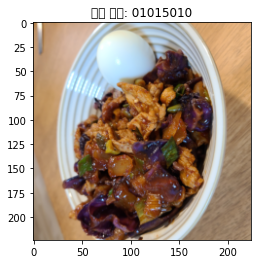

[예측 결과: 01011001] (실제 정답: 01011001)


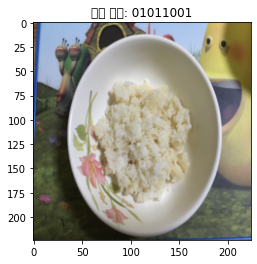

[예측 결과: 01015013] (실제 정답: 01015013)


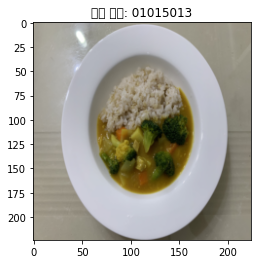

[예측 결과: 01011001] (실제 정답: 01011001)


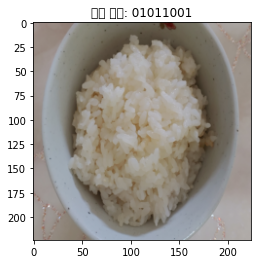

[예측 결과: 01015013] (실제 정답: 01015013)


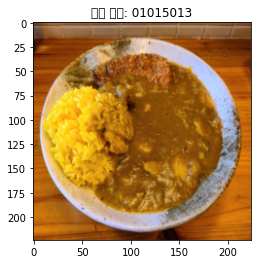

[예측 결과: 01011001] (실제 정답: 01011001)


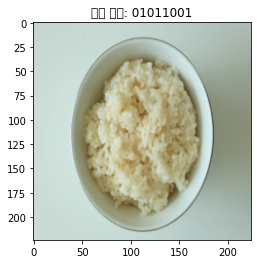

[예측 결과: 04016001] (실제 정답: 04016001)


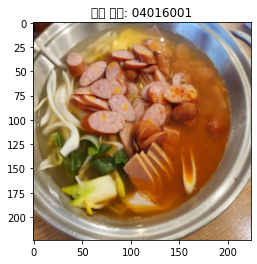

[예측 결과: 12011008] (실제 정답: 12011008)


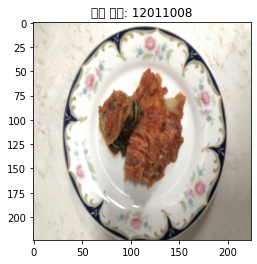

[Test Phase] Loss: 0.0011 Acc: 100.0000% Time: 14.4540s


In [ ]:
model.eval()
start_time = time.time()

if torch.cuda.is_available():
    model.cuda()

with torch.no_grad():
    running_loss = 0.
    running_corrects = 0

    for inputs, labels in test_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

        # 한 배치의 첫 번째 이미지에 대하여 결과 시각화
        print(f'[예측 결과: {class_names[preds[0]]}] (실제 정답: {class_names[labels.data[0]]})')
        imshow(inputs.cpu().data[0], title='예측 결과: ' + class_names[preds[0]])

    epoch_loss = running_loss / len(test_datasets)
    epoch_acc = running_corrects / len(test_datasets) * 100.
    print('[Test Phase] Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch_loss, epoch_acc, time.time() - start_time))

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44284 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_te

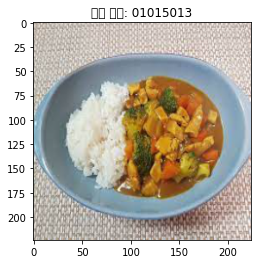

In [ ]:
from PIL import Image


image = Image.open('/content/drive/MyDrive/final_project/curry.jpeg')
image = transforms_test(image).unsqueeze(0).to(device)

with torch.no_grad():
    outputs = model(image)
    _, preds = torch.max(outputs, 1)
    imshow(image.cpu().data[0], title='예측 결과: ' + class_names[preds[0]])

In [ ]:
!pip install flask-ngrok

In [ ]:
import io
from flask_ngrok import run_with_ngrok
from flask import Flask, jsonify, request


# 이미지를 읽어 결과를 반환하는 함수
def get_prediction(image_bytes):
    image = Image.open(io.BytesIO(image_bytes))
    image = transforms_test(image).unsqueeze(0).to(device)

    with torch.no_grad():
        outputs = model(image)
        _, preds = torch.max(outputs, 1)
        imshow(image.cpu().data[0], title='예측 결과: ' + class_names[preds[0]])

    return class_names[preds[0]]


app = Flask(__name__)


@app.route('/', methods=['POST'])
def predict():
    if request.method == 'POST':
        # 이미지 바이트 데이터 받아오기
        file = request.files['file']
        image_bytes = file.read()

        # 분류 결과 확인 및 클라이언트에게 결과 반환
        class_name = get_prediction(image_bytes=image_bytes)
        print("결과:", {'class_name': class_name})
        return jsonify({'class_name': class_name})

In [ ]:
run_with_ngrok(app)
app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://60da-34-73-238-33.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/final_project/calorie/calorie.csv', encoding='cp949')

NameError: ignored

In [ ]:
def show1(food_list):
  food_names = []
  food_calories = []
  food_na_list = []
  for i in food_list:
    food_dict = {'01011001' : '쌀밥', '12011008' : '김치(배추김치)', '04016001': '부대찌개', '01015013' : '카레라이스', '01015010' : '제육(돼지고기)'}
    food_name=food_dict[i]
    food_calorie=data[data['음식명']==food_name]['1인분칼로리(kcal)']
    food_na=data[data['음식명']==food_name]['나트륨(g)']
    food_names.append(food_name)
    food_calories.append(food_calorie.values[0])
    food_na_list.append(food_na.values[0])
    
  return food_names, food_calories, food_na_list


In [ ]:
result1, result2, result3 =show1(class_names)
result1, result2
result2

In [ ]:
def recommend_food(food_name,cal,na,sex):
    data = pd.read_csv('/content/drive/MyDrive/final_project/calorie/calorie.csv', encoding='cp949')
    data = data[['음식명','1인분칼로리(kcal)', '나트륨(g)']]
    # for i in food_name:
    #   data = data[data['음식명'] != i]

    data = data[data['음식명'].apply(lambda x: True if x not in food_name else False)]
    
    print('work1')
    next_meal_na = 0 #성인 기준 매끼 나트륨 섭취량
    next_meal_cal = 0 # 성인 기준 매끼 식사 칼로리
    
    all_calorie=0
    all_na = 0
    # for i in range(len(cal)):
    #   all_calorie += cal[i]

    all_caloriell = sum(cal)
    all_na = sum(na)
    print('work2')

    #남자일 경우
    if sex == 'm':
        next_meal_cal = round(2500/3 - (all_calorie - 2500/3),1)
    #여자일 경우
    else:
        next_meal_cal = round(2000/3 - (all_calorie - 2000/3),1)

    next_meal_na = round(2000/3 - (all_na - 2000/3),1)
    print('work3')

    #다음 식사 칼로리 허용량이 0이거나 0에 근접한 경우
    if next_meal_cal <= 150:
        result = f'다음식사 칼로리가 {next_meal_cal}남았습니다.\n 추천할 수 있는 음식이 제한됩니다.'        
    else:
        #다음 식사할 수 있는 칼로리와 가장 비슷한 칼로리 5개 뽑기
        data['dis_cal'] = data['1인분칼로리(kcal)'].apply(lambda x : np.sqrt((x-next_meal_cal)**2)) #유클리디안 거리기준
        data['dis_na'] = data['나트륨(g)'].apply(lambda x : np.sqrt((x-next_meal_na)**2))

        # result = list(data.sort_values(by = 'dis_cal')['음식명'][:5].values)
    temp = data.sort_values(by = 'dis_cal')[:5]
    result = temp.sort_values(by = 'dis_na')[:2]['음식명'][:5].values
    return result


In [ ]:
recommend_food(result1, result2, result3,'m')

In [ ]:
np.array(result2).sum()

1141.1